In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [49]:
og = pd.read_csv('y_clean_thin.csv', index_col=0)
# og = pd.read_csv('y_clean.csv', index_col=0)
# og['RelativePath'] = og['RelativePath'].str.replace('\\', '/')
# og['path'] = '../Pictures/' + og['RelativePath'] + '/' + og['File']
paths = og.image_path

### MegaDetector

In [50]:
md = pd.read_csv('megadetector_results.csv', index_col=0)

### DeepFaune detector

In [59]:
df = pd.read_csv('deepfaune_detector_results.csv', index_col=0)
df.image_path = df.image_path.str.replace(r'^\.\./', '', regex=True)

### Comparison

In [62]:
merged = pd.merge(og, md, on='image_path')
merged = pd.merge(merged, df, on='image_path')
merged['og_empty'] = merged['species'] == 'empty'
merged['md_empty'] = merged['n_animals'] == 0
merged['df_empty'] = merged['empty']
merged[['image_path', 'og_empty', 'md_empty', 'df_empty']]

,image_path,og_empty,md_empty,df_empty
0,../pictures/01_CZARNE/B/Lato/1/2023-07-16 08-4...,False,False,False
1,../pictures/01_CZARNE/B/Lato/1/2023-07-21 06-3...,False,False,False
2,../pictures/01_CZARNE/B/Lato/1/2023-07-25 13-5...,False,False,False
3,../pictures/01_CZARNE/B/Lato/1/2023-07-28 13-4...,False,False,False
4,../pictures/01_CZARNE/B/Lato/1/2023-07-29 08-2...,False,False,False
...,...,...,...,...
18102,../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-02-22 ...,False,False,False
18103,../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-02-23 ...,False,False,False
18104,../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-01 ...,False,False,False
18105,../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-01 ...,False,False,False


In [61]:
print(f'Zgodność og z megadetector: {(merged.og_empty == merged.md_empty).sum() / len(merged) * 100: .1f}%')
print(f'Zgodność og z df detector: {(merged.og_empty == merged.df_empty).sum() / len(merged) * 100: .1f}%')

Zgodność og z megadetector:  77.4%
Zgodność og z df detector:  73.5%


### Human

In [102]:
og_og = pd.read_csv('y_clean.csv', index_col=0)
og_og.RelativePath = og_og.RelativePath.str.replace('\\', '/')
og_og['image_path'] = '../pictures/' + og_og.RelativePath + '/' + og_og.File

In [103]:
merged = pd.merge(og_og, md, on='image_path')
merged = pd.merge(merged, df, on='image_path')
merged['og_human'] = merged['species'] == 'human'

In [107]:
merged['og_human'] = merged['species'] == 'human'
merged['md_human'] = merged['category_x'] == 2
merged['df_human'] = merged['category_y'] == 2
merged[['image_path', 'og_human', 'md_human', 'df_human']]

,image_path,og_human,md_human,df_human
0,../pictures/01_CZARNE/B/Lato/1/2023-07-16 08-4...,False,False,True
1,../pictures/01_CZARNE/B/Lato/1/2023-07-21 06-3...,False,False,False
2,../pictures/01_CZARNE/B/Lato/1/2023-07-25 13-5...,False,False,False
3,../pictures/01_CZARNE/B/Lato/1/2023-07-28 13-4...,False,False,False
4,../pictures/01_CZARNE/B/Lato/1/2023-07-29 08-2...,False,False,False
...,...,...,...,...
18102,../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-02-22 ...,False,False,False
18103,../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-02-23 ...,False,False,False
18104,../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-01 ...,False,False,False
18105,../pictures/30_SUCHEDNIÓW/R/Zima/3/2023-03-01 ...,False,False,False


In [110]:
merged_human_only = merged[merged.og_human]

In [111]:
print(f'Zgodność og human z megadetector: {(merged_human_only.md_human).sum() / len(merged_human_only) * 100: .1f}%')
print(f'Zgodność og human z df detector: {(merged_human_only.df_human).sum() / len(merged_human_only) * 100: .1f}%')

Zgodność og human z megadetector:  90.9%
Zgodność og human z df detector:  82.9%


In [ ]:
cm_df = confusion_matrix(merged['og_human'], merged['df_human'])
cm_md = confusion_matrix(merged['og_human'], merged['md_human'])

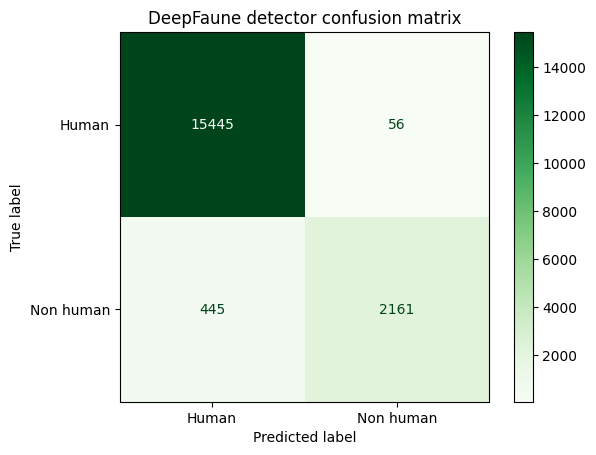

In [124]:
ConfusionMatrixDisplay(cm_df, display_labels=['Human', 'Non human']).plot(cmap="Greens")
plt.title('DeepFaune detector confusion matrix')
plt.show()

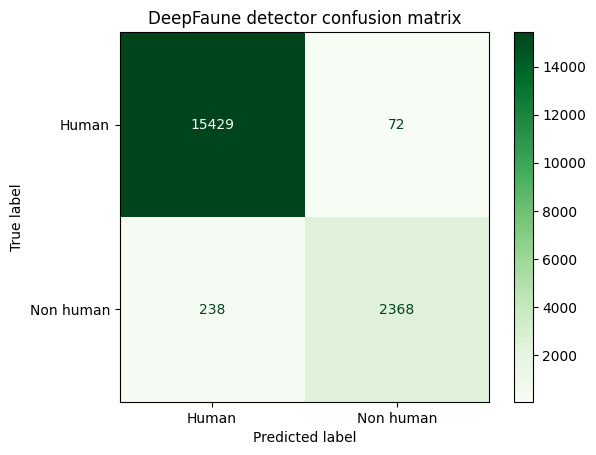

In [125]:
ConfusionMatrixDisplay(cm_md, display_labels=['Human', 'Non human']).plot(cmap="Greens")
plt.title('DeepFaune detector confusion matrix')
plt.show()